# Writing a Data Science Blog - Stack overflow developer survey

#### PERFORMING DATA ANALYSIS ON THE STACK OVERFLOW SURVEY OF 2017 AND 2018

**The main motto of this project is to follow the process of the CRISP-DM(Cross Industry Process for Data Mining) which are as follows:**


1) Business Understanding  
2) Data Understanding  
3) Data Preparation  
4) Data Modeling  
5) Result evaluation  
6) Deployment


### Business Understanding

In this notebook, I'll look at the Stack Overflow findings from both 2017 and 2018 to discover more about professional developers and where they should put their attention in order to get the best career prospects.

**In order to obtain this knowledge, I will attempt to answer few questions:**  
1) In the 2017 and 2018, which programming languages are most commonly used and how do they vary in each year?  
2) How does the salary vary based on country, experience and company type in 2018?  
3) Is stack overflow a useful platform for programmers based on the survey?  

### Data Understanding

To answer all the above questions, the 2017 and 2018 data must be explored to decide the appropriate columns to be considered and how they can be used to answer the questions. The following codes will provide a basic understanding of the data and help us decide the useful data.

In [1]:
# Import all the libraries
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
import random
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Stackoverflow survey data of 2017 and 2018
#Ref link: https://www.kaggle.com/stackoverflow/so-survey-2017
#Ref link for all files : https://insights.stackoverflow.com/survey

df_2017 = pd.read_csv('survey_results_public_2017.csv')
df_2018 = pd.read_csv('survey_results_public_2018.csv')

In [3]:
# Set the columns and rows limit

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [4]:
# Overview of 2017 data
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [5]:
# Overview of 2018 data
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [6]:
# Dimensions of 2017 data
df_2017.shape

(51392, 154)

In [7]:
# Dimensions of 2018 data
df_2018.shape

(98855, 129)

In [8]:
# Check whether there are any null values in the 2017 data set
df_2017.isna().sum()

Respondent                              0
Professional                            0
ProgramHobby                            0
Country                                 0
University                              0
EmploymentStatus                        0
FormalEducation                         0
MajorUndergrad                       8551
HomeRemote                           7384
CompanySize                         12470
CompanyType                         12569
YearsProgram                          247
YearsCodedJob                       10502
YearsCodedJobPast                   50418
DeveloperType                       15267
WebDeveloperType                    40696
MobileDeveloperType                 49839
NonDeveloperType                    46502
CareerSatisfaction                   8697
JobSatisfaction                     11016
ExCoderReturn                       50469
ExCoderNotForMe                     50471
ExCoderBalance                      50469
ExCoder10Years                    

In [9]:
# Percentage of null values in the 2017 data set
df_2017.isnull().mean()

Respondent                          0.000000
Professional                        0.000000
ProgramHobby                        0.000000
Country                             0.000000
University                          0.000000
EmploymentStatus                    0.000000
FormalEducation                     0.000000
MajorUndergrad                      0.166388
HomeRemote                          0.143680
CompanySize                         0.242645
CompanyType                         0.244571
YearsProgram                        0.004806
YearsCodedJob                       0.204351
YearsCodedJobPast                   0.981048
DeveloperType                       0.297070
WebDeveloperType                    0.791874
MobileDeveloperType                 0.969781
NonDeveloperType                    0.904849
CareerSatisfaction                  0.169229
JobSatisfaction                     0.214352
ExCoderReturn                       0.982040
ExCoderNotForMe                     0.982079
ExCoderBal

In [10]:
# Check whether there are any null values in the 2018 data set
df_2018.isna().sum()

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

In [11]:
# Percentage of null values in the 2018 data set
df_2018.isnull().mean()

Respondent                     0.000000
Hobby                          0.000000
OpenSource                     0.000000
Country                        0.004168
Student                        0.039998
Employment                     0.035749
FormalEducation                0.042001
UndergradMajor                 0.200486
CompanySize                    0.276405
DevType                        0.068353
YearsCoding                    0.050781
YearsCodingProf                0.211947
JobSatisfaction                0.299216
CareerSatisfaction             0.226099
HopeFiveYears                  0.234050
JobSearchStatus                0.195913
LastNewJob                     0.201973
AssessJob1                     0.322391
AssessJob2                     0.322391
AssessJob3                     0.322391
AssessJob4                     0.322391
AssessJob5                     0.322391
AssessJob6                     0.322391
AssessJob7                     0.322391
AssessJob8                     0.322391


**Observations:**
- It can be observed that the majority of the columns have null values ranging to more than 90% null values. 
- The corresponding columns with null values more than a certain percentage can be automatically dropped. 
- Many columns also does not hold value with respect to answer our business questions which will also be dropped.

**On careful understanding of the schema and data, the following columns have been chosen for 2017 and 2018 data to answer the defined business questions:**

**2017 -**
Professional, HaveWorkedLanguage, StackOverflowSatisfaction, StackOverflowFoundAnswer, StackOverflowCopiedCode, StackOverflowAnswer, StackOverflowHelpful, SurveyLong

**2018 -**
LanguageWorkedWith, Student, Country, CompanySize, YearsCoding, ConvertedSalary, StackOverflowRecommend, StackOverflowVisit, StackOverflowParticipate, SurveyTooLong, SurveyEasy

### Data Preparation

With a better understanding of the data, the next process of cleaning the data (missing values, renaming/combining multiple categorical values) and getting it in the required format must be accomplished. Apart from that, checks must be done as to whether the data being used is significant enough to answer the designed business questions.

In [12]:
# Choosing only the columns defined in Data Understanding and dropping the rest

df_2017_upd = df_2017[['Professional','HaveWorkedLanguage','StackOverflowSatisfaction','StackOverflowFoundAnswer','StackOverflowCopiedCode','StackOverflowAnswer','StackOverflowHelpful','SurveyLong']]
df_2018_upd = df_2018[['LanguageWorkedWith','Student','Employment','Country','CompanySize','YearsCoding','ConvertedSalary','StackOverflowRecommend','StackOverflowVisit','StackOverflowParticipate','SurveyTooLong','SurveyEasy']]

**1) In the 2017 and 2018, which programming languages are most commonly used and how do they vary in each year?**

#### Data Cleaning & Modeling

In [13]:
# Getting the required data and initializing required variables

df_2017_q1 = df_2017_upd[df_2017_upd['HaveWorkedLanguage'].isna()==False][['Professional','HaveWorkedLanguage']].reset_index()
df_2018_q1 = df_2018_upd[df_2018_upd['LanguageWorkedWith'].isna()==False][['Student','LanguageWorkedWith','Employment']].reset_index()
dict_2017_q1 = {'Professional':[],'Student':[],'All':[]}
dict_2018_q1 = {'Professional':[],'Student':[],'All':[]}

In [14]:
# Getting the languages used for Overall, Professional and Student in 2017

for i in range(len(df_2017_q1)):
    ptype = ''
    if df_2017_q1.loc[i,'Professional'] in ['Professional developer','Professional non-developer who sometimes writes code','Used to be a professional developer']:
        ptype = 'Professional'
    elif df_2017_q1.loc[i,'Professional'] == 'Student':
        ptype = 'Student'
        
    """
    The above code classifies whether that person is a student, Professional or other.
    
    """
    
    lang = df_2017_q1.loc[i,'HaveWorkedLanguage'].split('; ')
    
    for l in lang:
        if ptype == '':
#             break
            pass
        else:
            dict_2017_q1[ptype].append(l)
            
        dict_2017_q1['All'].append(l)

In [15]:
# Getting the languages used for Overall, Professional and Student in 2018

for i in range(len(df_2018_q1)):
    ptype = ''
    if df_2018_q1.loc[i,'Student'] in ['Yes, part-time','Yes, full-time']:
        ptype = 'Student'
    elif df_2018_q1.loc[i,'Student'] == 'No' and df_2018_q1.loc[i,'Employment'] in ['Employed part-time', 'Employed full-time','Independent contractor, freelancer, or self-employed']:
        ptype = 'Professional'
        
    """
    The above code classifies whether that person is a student or not.
    A check is also being made that person is a professional using the student employment which is shown above.
    
    """
    lang = df_2018_q1.loc[i,'LanguageWorkedWith'].split(';')
    
    for l in lang:
        if ptype == '':
#             break
            pass
        else:   
            dict_2018_q1[ptype].append(l)

        dict_2018_q1['All'].append(l)

In [16]:
# Building counter variable for Overall, Professional and Student in 2017 & 2018

pro_2017 = Counter(dict_2017_q1['Professional'])
stud_2017 = Counter(dict_2017_q1['Student'])
all_2017 = Counter(dict_2017_q1['All'])
pro_2018 = Counter(dict_2018_q1['Professional'])
stud_2018 = Counter(dict_2018_q1['Student'])
all_2018 = Counter(dict_2018_q1['All'])

print(f"2017 -\nAll:{len(dict_2017_q1['All'])}\nProfessional:{len(dict_2017_q1['Professional'])}\nStudent:{len(dict_2017_q1['Student'])}\n")
print(f"2018 -\nAll:{len(dict_2018_q1['All'])}\nProfessional:{len(dict_2018_q1['Professional'])}\nStudent:{len(dict_2018_q1['Student'])}")

2017 -
All:138664
Professional:117615
Student:18896

2018 -
All:485668
Professional:335687
Student:121290


Text(0.5, 1.0, 'Student - 2017')

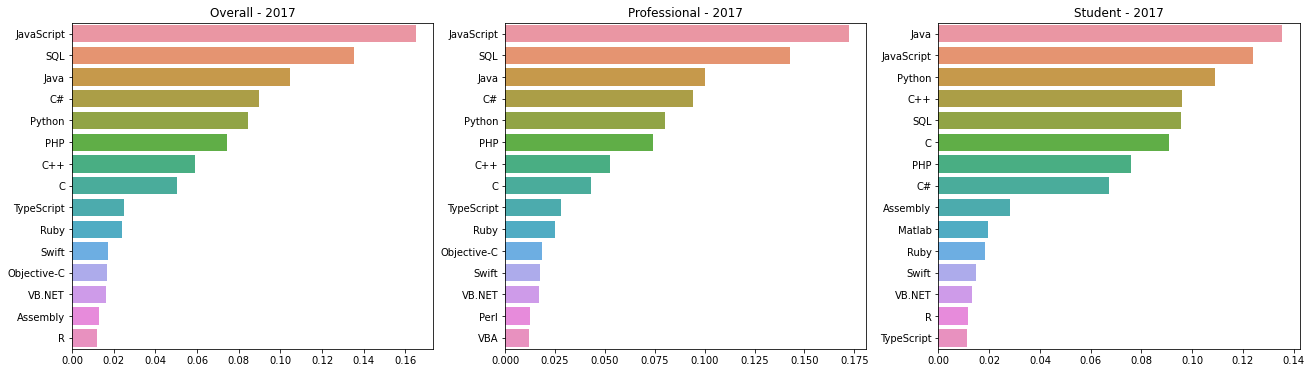

In [17]:
# Visualizing 2017 data for 15 most common languages used by Overall, Professional and Student

plt.figure(figsize=(22, 6))

plt.subplot(131)
sns.barplot([j/len(dict_2017_q1['All']) for i,j in all_2017.most_common(15)],[i for i,j in all_2017.most_common(15)],orient="h")
plt.title('Overall - 2017')

plt.subplot(132)
sns.barplot([j/len(dict_2017_q1['Professional']) for i,j in pro_2017.most_common(15)],[i for i,j in pro_2017.most_common(15)],orient="h")
plt.title('Professional - 2017')

plt.subplot(133)
sns.barplot([j/len(dict_2017_q1['Student']) for i,j in stud_2017.most_common(15)],[i for i,j in stud_2017.most_common(15)],orient="h")
plt.title('Student - 2017')

Text(0.5, 1.0, 'Student - 2018')

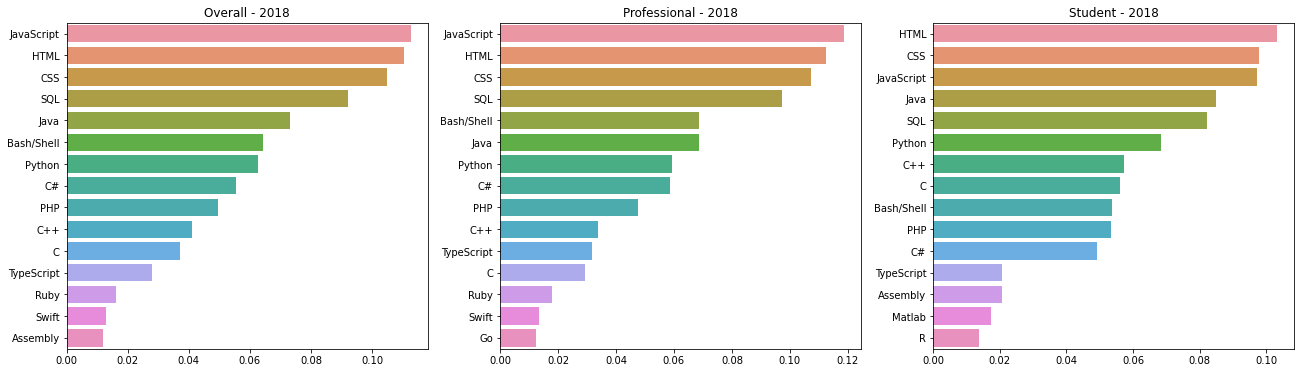

In [18]:
# Visualizing 2018 data for 15 most common languages used by Overall, Professional and Student

plt.figure(figsize=(22, 6))

plt.subplot(131)
sns.barplot([j/len(dict_2018_q1['All']) for i,j in all_2018.most_common(15)],[i for i,j in all_2018.most_common(15)],orient="h")
plt.title('Overall - 2018')

plt.subplot(132)
sns.barplot([j/len(dict_2018_q1['Professional']) for i,j in pro_2018.most_common(15)],[i for i,j in pro_2018.most_common(15)],orient="h")
plt.title('Professional - 2018')

plt.subplot(133)
sns.barplot([j/len(dict_2018_q1['Student']) for i,j in stud_2018.most_common(15)],[i for i,j in stud_2018.most_common(15)],orient="h")
plt.title('Student - 2018')

#### Result Evaluation

**Observations:**
- It can be observed that Javascript remains the top language overall in 2017 and 2018.
- The language ranking of Professional and Overall are similar as Professional records are the majority.
- Javascript is the top language for Professionals in both years although the next 5 languages vary a little.
- The top language for Students in 2017 and 2018 were Java and HTML. This could suggest that the importance of web based languages has increased among students over the year.
- Although the top languages for Professional and Student differs in 2017, it is more similar in 2018 indicating that languages being adopted by students are being more towards Professional developer requirements.

**2) How does the salary vary based on country, experience and company type in 2018?**

#### Data Cleaning & Modeling

In [19]:
# Getting the required data

df_2018_q2 = df_2018_upd[df_2018_upd['ConvertedSalary'].isna()==False][['Country','CompanySize','YearsCoding','ConvertedSalary']].reset_index()

In [20]:
# View the data
df_2018_q2.head()

,index,Country,CompanySize,YearsCoding,ConvertedSalary
0,1,United Kingdom,"10,000 or more employees",30 or more years,70841.0
1,4,South Africa,"10,000 or more employees",6-8 years,21426.0
2,5,United Kingdom,10 to 19 employees,6-8 years,41671.0
3,6,United States,"10,000 or more employees",9-11 years,120000.0
4,8,United States,100 to 499 employees,30 or more years,250000.0


In [21]:
# Checking for nulls
df_2018_q2.isna().sum()

index                 0
Country               0
CompanySize        6742
YearsCoding          19
ConvertedSalary       0
dtype: int64

In [22]:
# Checking Company Size distribution
df_2018_q2.groupby('CompanySize')['Country'].count()

CompanySize
1,000 to 4,999 employees    4529
10 to 19 employees          4373
10,000 or more employees    5756
100 to 499 employees        8141
20 to 99 employees          9775
5,000 to 9,999 employees    1766
500 to 999 employees        2668
Fewer than 10 employees     3952
Name: Country, dtype: int64

In [23]:
# Getting the Company Size split with weights 
comp_size_split = df_2018_q2.groupby('CompanySize')['Country'].count()/df_2018_q2.CompanySize.count()
comp_size_split

CompanySize
1,000 to 4,999 employees    0.110571
10 to 19 employees          0.106763
10,000 or more employees    0.140527
100 to 499 employees        0.198755
20 to 99 employees          0.238647
5,000 to 9,999 employees    0.043115
500 to 999 employees        0.065137
Fewer than 10 employees     0.096484
Name: Country, dtype: float64

In [24]:
# Getting the values to impute by randomly choosing the values based on their weights
y = [random.choices(comp_size_split.index,weights=comp_size_split.values)[0] for i in range(len(df_2018_q2[df_2018_q2.CompanySize.isna()==True]))]

In [25]:
# Imputing the randomly generated values to the dataframe
x = 0 
for i in df_2018_q2[df_2018_q2.CompanySize.isna()==True].index:
    df_2018_q2.loc[i,'CompanySize'] = y[x]
    x+=1

In [26]:
# Checking Years of Coding distribution
df_2018_q2.groupby('YearsCoding')['Country'].count()

YearsCoding
0-2 years            3188
12-14 years          4998
15-17 years          3828
18-20 years          3168
21-23 years          1636
24-26 years          1159
27-29 years           631
3-5 years            9788
30 or more years     2029
6-8 years           10234
9-11 years           7024
Name: Country, dtype: int64

In [27]:
# Imputing the Years of Coding with the mode as the number of missing values is very low
df_2018_q2.fillna(value = {'YearsCoding':'6-8 years'},inplace=True)

In [28]:
# Checking for nulls
df_2018_q2.isna().sum()

index              0
Country            0
CompanySize        0
YearsCoding        0
ConvertedSalary    0
dtype: int64

Text(0.5, 1.0, 'Company Size vs Salary')

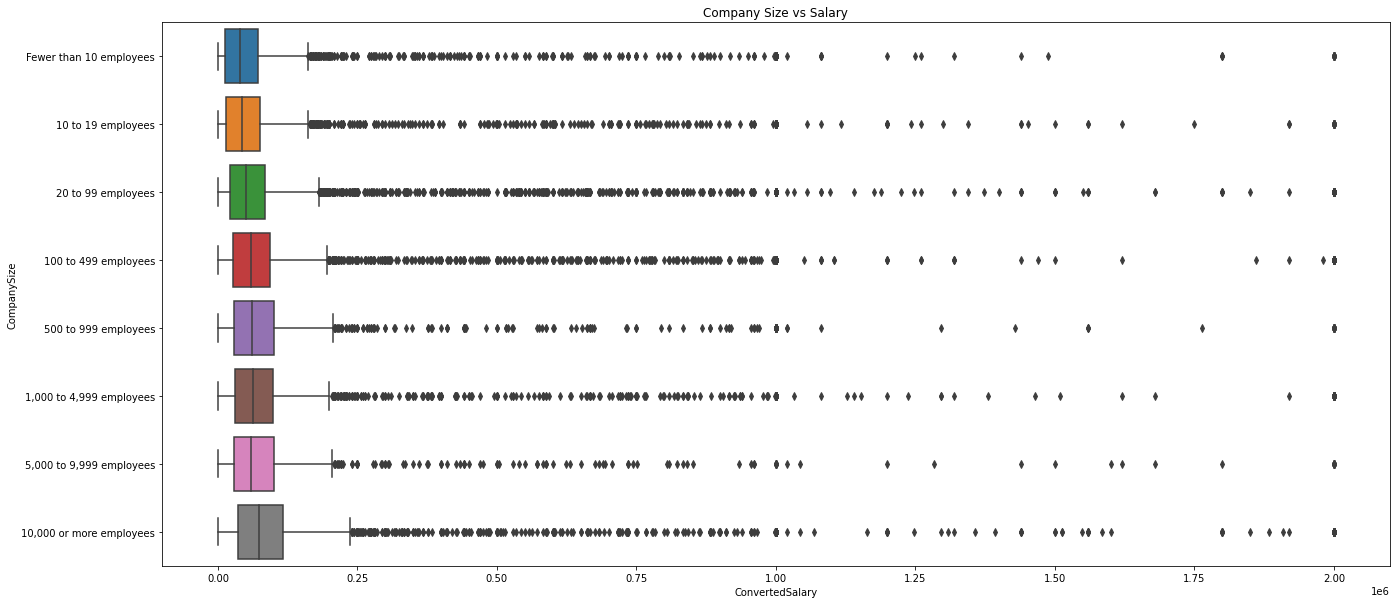

In [29]:
# Visualizing Salaries for different Company Size

plt.figure(figsize=(22, 10))
sns.boxplot(y='CompanySize',x='ConvertedSalary',data=df_2018_q2, order = ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees'])
plt.title('Company Size vs Salary')

Text(0.5, 1.0, 'Years of Coding vs Salary')

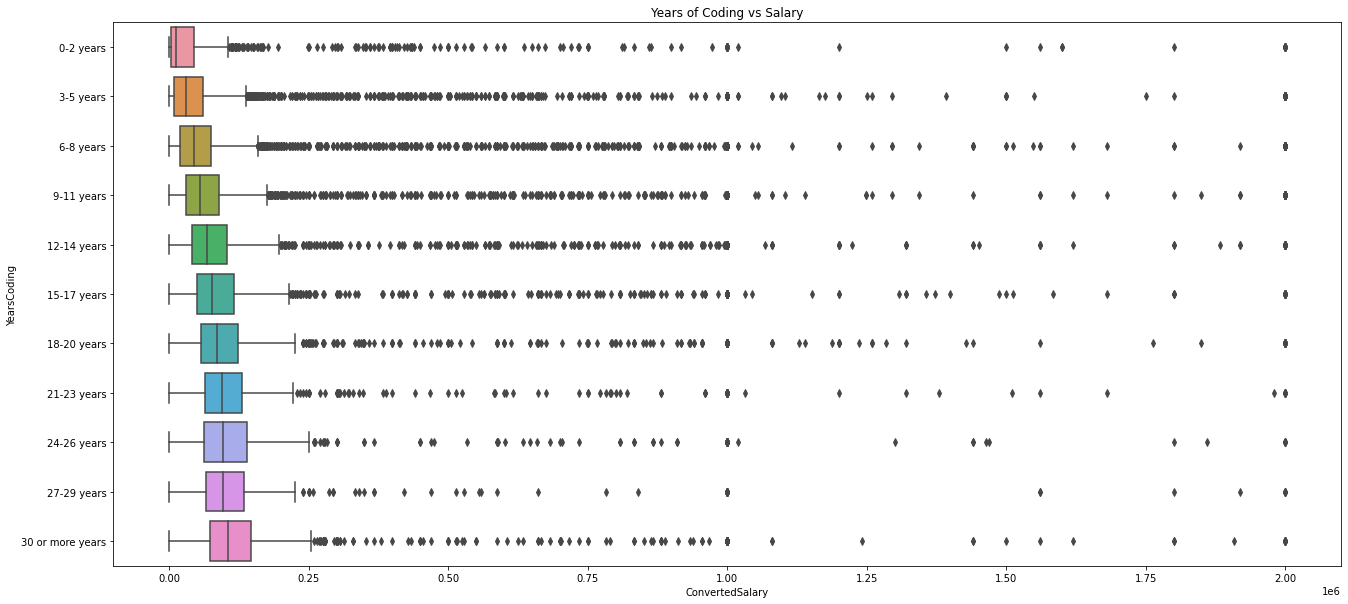

In [30]:
# Visualizing Salaries based on the Years of Coding

plt.figure(figsize=(22, 10))
sns.boxplot(y='YearsCoding',x='ConvertedSalary', data=df_2018_q2, order = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years'])
plt.title('Years of Coding vs Salary')

Text(0.5, 1.0, 'Country vs Salary')

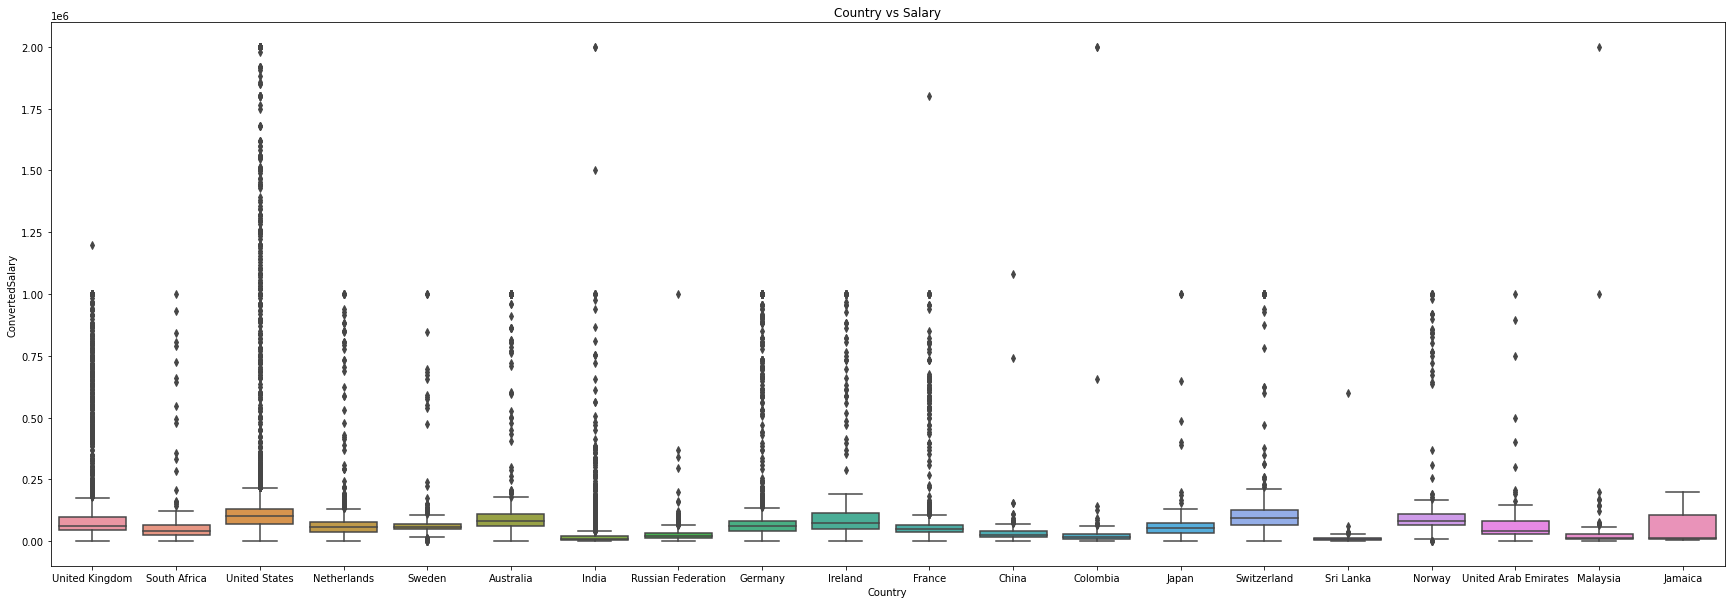

In [31]:
# Visualizing Salaries for 20 different countries

country_list = ['United Kingdom', 'South Africa', 'United States', 'Netherlands', 'Sweden', 'Australia', 'India', 'Russian Federation', 'Germany', 'Ireland', 'France', 'China', 'Colombia', 'Japan', 'United Arab Emirates', 'Malaysia', 'Jamaica', 'Switzerland', 'Sri Lanka', 'Norway']

plt.figure(figsize=(30,10))
sns.boxplot(x='Country',y='ConvertedSalary', data=df_2018_q2[df_2018_q2.Country.isin(country_list)])
plt.title('Country vs Salary')

#### Result Evaluation

**Observations:**
- It can be observed that bigger the Company Size, the range of salaries slightly get higher. Moreover, considering the outliers, the majority of the outliers are present till $1Mn. 
- A clear rise can be seen in the salaries with increase in experience. Furthermore, it can be noted that with experience 24yrs or above, the salary range does not vary as much as under 24yrs experience.
- Developed countries such as United States, United Kingdom comparitively have much higher salaries than developing countries like India, Sri Lanka. An interesting observation can be made that although China and Japan are developed countries, the range of salaries are lower suggesting other factors like currency, government and policies come into play.

**3) Is stack overflow a useful platform for programmers based on the survey?**

#### Data Cleaning & Modeling

In [32]:
# Getting the required data

df_2017_q3 = df_2017_upd[df_2017_upd['StackOverflowSatisfaction'].isna()==False][['StackOverflowSatisfaction','StackOverflowFoundAnswer','StackOverflowCopiedCode','StackOverflowAnswer','StackOverflowHelpful','SurveyLong']]
df_2018_q3 = df_2018_upd[df_2018_upd['StackOverflowRecommend'].isna()==False][['StackOverflowRecommend','StackOverflowVisit','StackOverflowParticipate','SurveyTooLong','SurveyEasy']]

In [33]:
# Checking for nulls
df_2017_q3.isna().sum()

StackOverflowSatisfaction       0
StackOverflowFoundAnswer     2302
StackOverflowCopiedCode      2683
StackOverflowAnswer          3036
StackOverflowHelpful         2646
SurveyLong                   2123
dtype: int64

In [34]:
df_2017_q3.StackOverflowSatisfaction = [int(i) for i in df_2017_q3.StackOverflowSatisfaction]

In [35]:
# Checking Stack Overflow Found Answer distribution
df_2017_q3.groupby('StackOverflowFoundAnswer')['StackOverflowSatisfaction'].count()

StackOverflowFoundAnswer
At least once each day      5279
At least once each week    13090
Haven't done at all          619
Once or twice               2861
Several times              12441
Name: StackOverflowSatisfaction, dtype: int64

In [36]:
# Checking Stack Overflow Copied Code distribution
df_2017_q3.groupby('StackOverflowCopiedCode')['StackOverflowSatisfaction'].count()

StackOverflowCopiedCode
At least once each day      1026
At least once each week     3811
Haven't done at all         8433
Once or twice              10400
Several times              10239
Name: StackOverflowSatisfaction, dtype: int64

In [37]:
# Checking Stack Overflow Answer written distribution
df_2017_q3.groupby('StackOverflowAnswer')['StackOverflowSatisfaction'].count()

StackOverflowAnswer
At least once each day       429
At least once each week     1318
Haven't done at all        19394
Once or twice               7732
Several times               4683
Name: StackOverflowSatisfaction, dtype: int64

In [38]:
# Checking Stack Overflow Helpful distribution
df_2017_q3.groupby('StackOverflowHelpful')['StackOverflowSatisfaction'].count()

StackOverflowHelpful
Agree                16502
Disagree               192
Somewhat agree        3272
Strongly agree       13902
Strongly disagree       78
Name: StackOverflowSatisfaction, dtype: int64

In [39]:
# Checking Stack Overflow Survey Length distribution
df_2017_q3.groupby('SurveyLong')['StackOverflowSatisfaction'].count()

SurveyLong
Agree                 8002
Disagree              8442
Somewhat agree       11189
Strongly agree        5786
Strongly disagree     1050
Name: StackOverflowSatisfaction, dtype: int64

In [40]:
# For all the above columns, the null values are imputed by randomly choosing values in the colum based on their probability of occurence

for i in ['StackOverflowFoundAnswer','StackOverflowCopiedCode','StackOverflowAnswer','StackOverflowHelpful','SurveyLong']:
    split_ind_val = df_2017_q3.groupby(i)['StackOverflowSatisfaction'].count()/df_2017_q3[i].count()
    y = [random.choices(split_ind_val.index,weights=split_ind_val.values)[0] for i in range(len(df_2017_q3[df_2017_q3[i].isna()==True]))]
    x = 0 
    for j in df_2017_q3[df_2017_q3[i].isna()==True].index:
        df_2017_q3.loc[j,i] = y[x]
        x+=1


In [41]:
# Checking for nulls
df_2017_q3.isna().sum()

StackOverflowSatisfaction    0
StackOverflowFoundAnswer     0
StackOverflowCopiedCode      0
StackOverflowAnswer          0
StackOverflowHelpful         0
SurveyLong                   0
dtype: int64

In [42]:
# Checking for nulls
df_2018_q3.isna().sum()

StackOverflowRecommend          0
StackOverflowVisit             64
StackOverflowParticipate    11122
SurveyTooLong               10978
SurveyEasy                  11023
dtype: int64

In [43]:
df_2018_q3.StackOverflowRecommend = df_2018_q3.StackOverflowRecommend.map({'0 (Not Likely)':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10 (Very Likely)':10})

In [44]:
# Checking Stack Overflow Visit distribution
df_2018_q3.groupby('StackOverflowVisit')['StackOverflowRecommend'].count()

StackOverflowVisit
A few times per month or weekly                        8763
A few times per week                                  17082
Daily or almost daily                                 24856
I have never visited Stack Overflow (before today)      411
Less than once per month or monthly                    1549
Multiple times per day                                23764
Name: StackOverflowRecommend, dtype: int64

In [45]:
# Checking Stack Overflow Participation distribution
df_2018_q3.groupby('StackOverflowParticipate')['StackOverflowRecommend'].count()

StackOverflowParticipate
A few times per month or weekly                       14783
A few times per week                                   7623
Daily or almost daily                                  3881
I have never participated in Q&A on Stack Overflow    11318
Less than once per month or monthly                   25649
Multiple times per day                                 2113
Name: StackOverflowRecommend, dtype: int64

In [46]:
# Checking Stack Overflow Survey Length distribution
df_2018_q3.groupby('SurveyTooLong')['StackOverflowRecommend'].count()

SurveyTooLong
The survey was an appropriate length    33094
The survey was too long                 31950
The survey was too short                  467
Name: StackOverflowRecommend, dtype: int64

In [47]:
# Checking Stack Overflow Visit distribution
df_2018_q3.groupby('SurveyEasy')['StackOverflowRecommend'].count()

SurveyEasy
Neither easy nor difficult    15175
Somewhat difficult             4120
Somewhat easy                 24317
Very difficult                  460
Very easy                     21394
Name: StackOverflowRecommend, dtype: int64

In [48]:
# For all the above columns, the null values are imputed by randomly choosing values in the colum based on their probability of occurence

for i in ['StackOverflowVisit','StackOverflowParticipate','SurveyTooLong','SurveyEasy']:
    split_ind_val = df_2018_q3.groupby(i)['StackOverflowRecommend'].count()/df_2018_q3[i].count()
    y = [random.choices(split_ind_val.index,weights=split_ind_val.values)[0] for i in range(len(df_2018_q3[df_2018_q3[i].isna()==True]))]
    x = 0 
    for j in df_2018_q3[df_2018_q3[i].isna()==True].index:
        df_2018_q3.loc[j,i] = y[x]
        x+=1


In [49]:
# Checking for nulls
df_2018_q3.isna().sum()

StackOverflowRecommend      0
StackOverflowVisit          0
StackOverflowParticipate    0
SurveyTooLong               0
SurveyEasy                  0
dtype: int64

Text(0.5, 1.0, 'Stack Overflow Satisfaction - 2018')

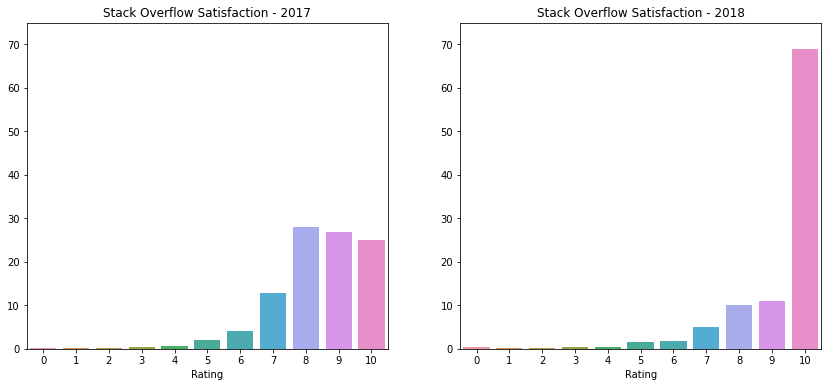

In [50]:
# Visualizing 2017 and 2018 data for Stack Overflow Satisfaction

plt.figure(figsize=(22, 6))

plt.subplot(131)
sat_2017 = 100*df_2017_q3.groupby('StackOverflowSatisfaction')['StackOverflowSatisfaction'].count()/df_2017_q3['StackOverflowSatisfaction'].count()
sns.barplot(sat_2017.index,sat_2017.values)
plt.ylim(0,75)
plt.xlabel('Rating')
plt.title('Stack Overflow Satisfaction - 2017')

plt.subplot(132)
sat_2018 = 100*df_2018_q3.groupby('StackOverflowRecommend')['StackOverflowRecommend'].count()/df_2018_q3['StackOverflowRecommend'].count()
sns.barplot(sat_2018.index,sat_2018.values)
plt.ylim(0,75)
plt.xlabel('Rating')
plt.title('Stack Overflow Satisfaction - 2018')

Text(0.5, 1.0, '2017 Stack Overflow Satisfaction - Answered')

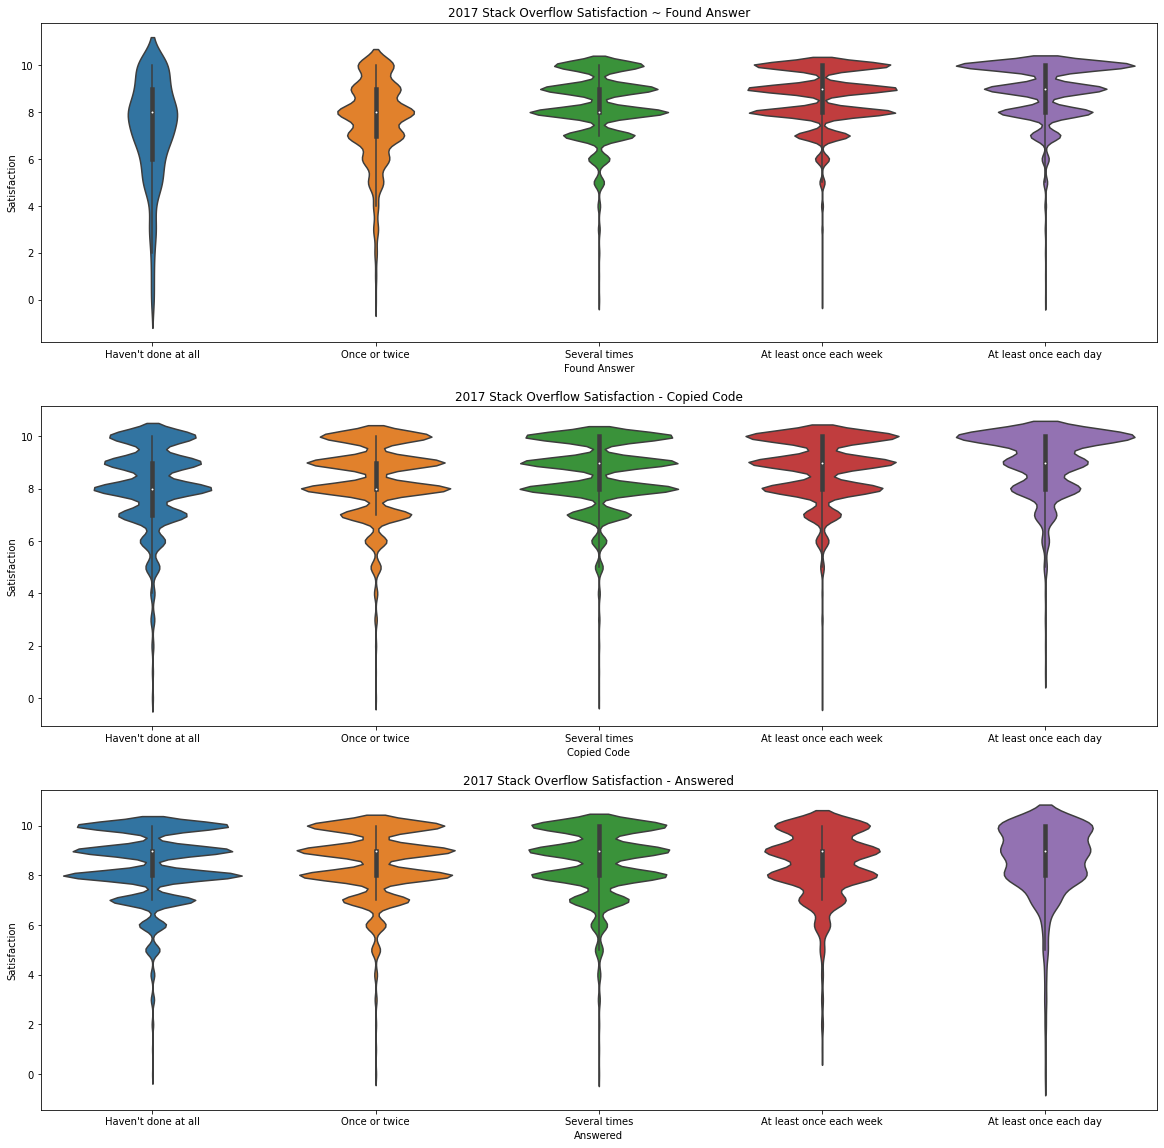

In [51]:
# Measuring 2017 Stack Overflow Satisfaction with respect to the users finding their answer, copying the required code and answering a question on Stack Overflow

plt.figure(figsize=(20, 20))

plt.subplot(311)
sns.violinplot(df_2017_q3.StackOverflowFoundAnswer,df_2017_q3.StackOverflowSatisfaction, order = ["Haven't done at all",'Once or twice','Several times','At least once each week','At least once each day'])
plt.xlabel('Found Answer')
plt.ylabel('Satisfaction')
plt.title('2017 Stack Overflow Satisfaction ~ Found Answer')

plt.subplot(312)
sns.violinplot(df_2017_q3.StackOverflowCopiedCode,df_2017_q3.StackOverflowSatisfaction, order = ["Haven't done at all",'Once or twice','Several times','At least once each week','At least once each day'])
plt.xlabel('Copied Code')
plt.ylabel('Satisfaction')
plt.title('2017 Stack Overflow Satisfaction - Copied Code')

plt.subplot(313)
sns.violinplot(df_2017_q3.StackOverflowAnswer,df_2017_q3.StackOverflowSatisfaction, order = ["Haven't done at all",'Once or twice','Several times','At least once each week','At least once each day'])
plt.xlabel('Answered')
plt.ylabel('Satisfaction')
plt.title('2017 Stack Overflow Satisfaction - Answered')

Text(0.5, 1.0, '2017 Stack Overflow Satisfaction ~ Survey Length Dissatisfaction')

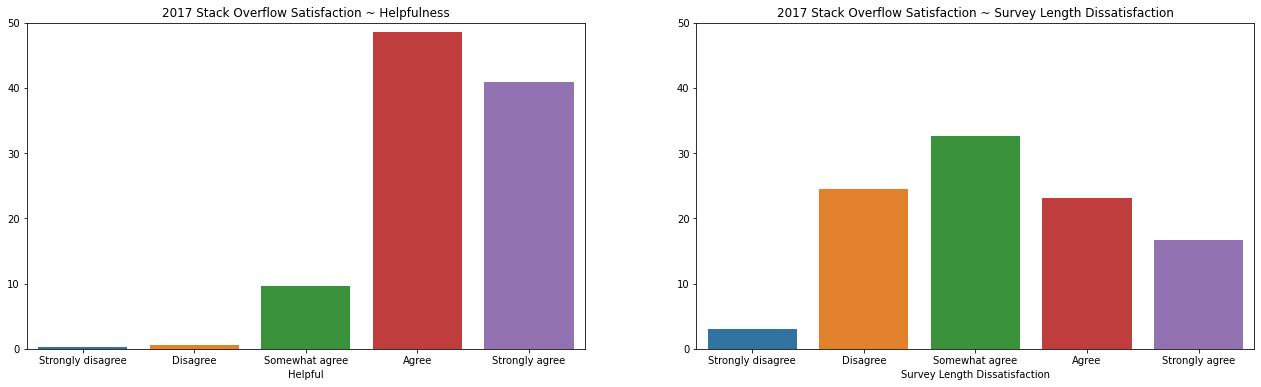

In [52]:
# Measuring 2017 Stack Overflow Satisfaction with respect to its helpfulness and survey length

plt.figure(figsize=(22, 6))

plt.subplot(121)
help_2017 = 100*df_2017_q3.groupby('StackOverflowHelpful')['StackOverflowSatisfaction'].count()/df_2017_q3['StackOverflowSatisfaction'].count()
sns.barplot(help_2017.index,help_2017.values, order = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree'])
plt.ylim(0,50)
plt.xlabel('Helpful')
plt.title('2017 Stack Overflow Satisfaction ~ Helpfulness')

plt.subplot(122)
surv_2017 = 100*df_2017_q3.groupby('SurveyLong')['StackOverflowSatisfaction'].count()/df_2017_q3['StackOverflowSatisfaction'].count()
sns.barplot(surv_2017.index,surv_2017.values, order = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree'])
plt.ylim(0,50)
plt.xlabel('Survey Length Dissatisfaction')
plt.title('2017 Stack Overflow Satisfaction ~ Survey Length Dissatisfaction')

Text(0.5, 1.0, '2018 Stack Overflow Satisfaction - Participation')

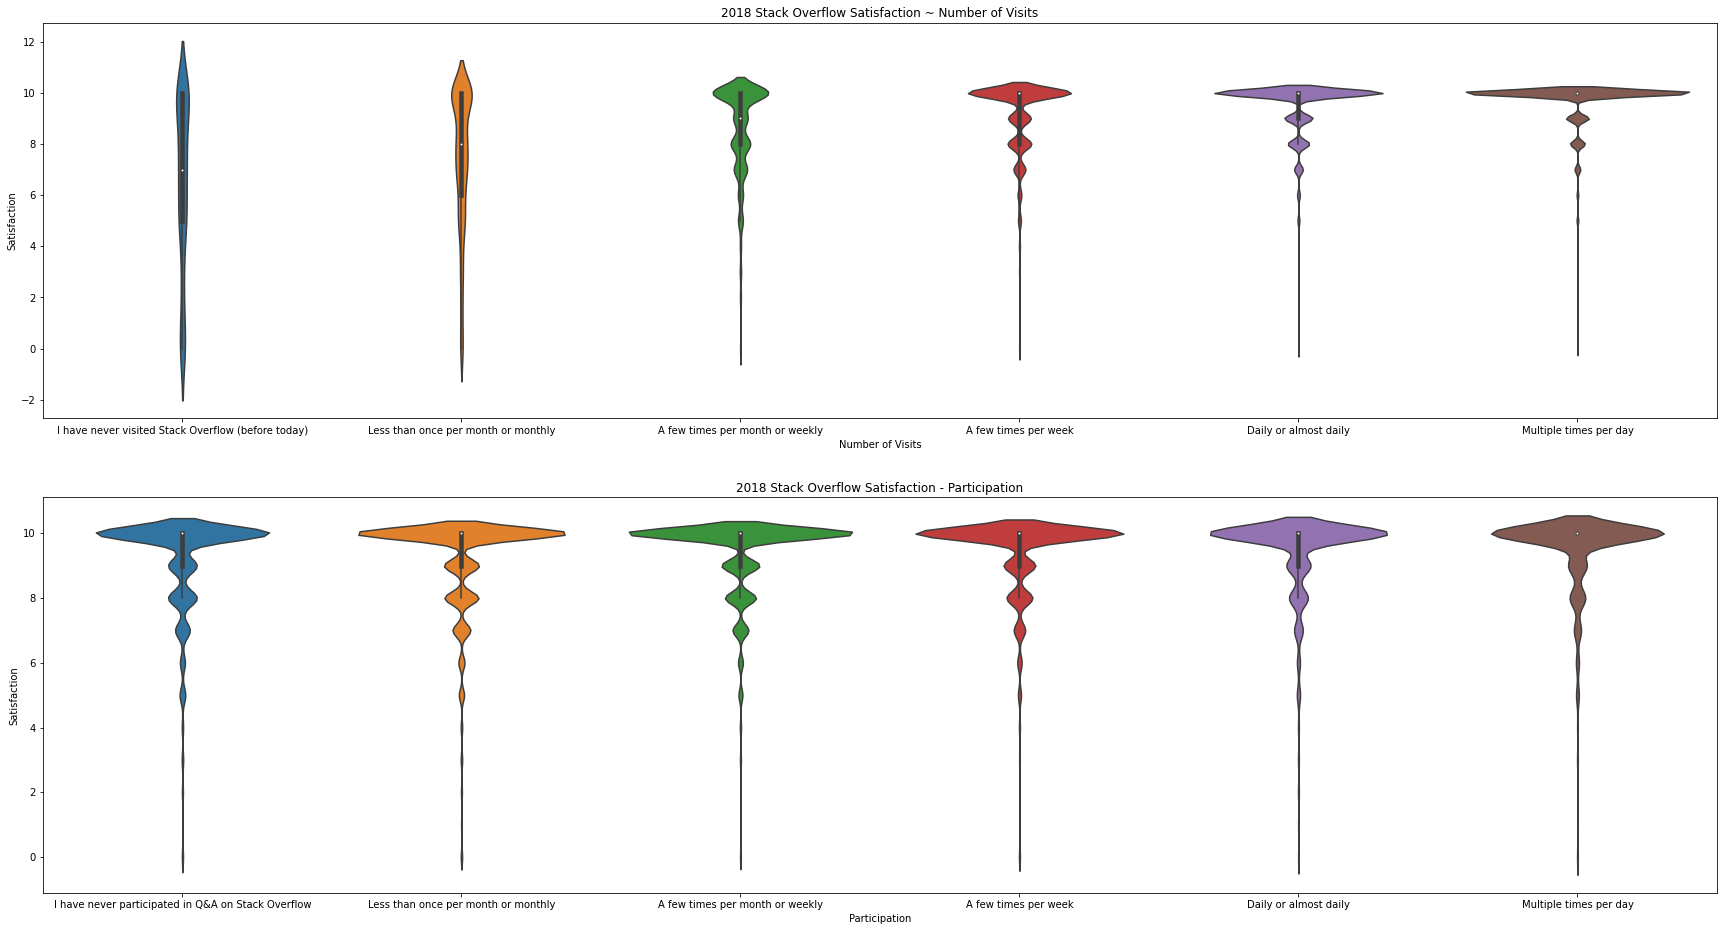

In [53]:
# Measuring 2018 Stack Overflow Satisfaction with respect to the users number of visits and participation

plt.figure(figsize=(30, 16))

plt.subplot(211)
sns.violinplot(df_2018_q3.StackOverflowVisit,df_2018_q3.StackOverflowRecommend, order = ['I have never visited Stack Overflow (before today)', 'Less than once per month or monthly', 'A few times per month or weekly', 'A few times per week', 'Daily or almost daily', 'Multiple times per day'])
plt.xlabel('Number of Visits')
plt.ylabel('Satisfaction')
plt.title('2018 Stack Overflow Satisfaction ~ Number of Visits')

plt.subplot(212)
sns.violinplot(df_2018_q3.StackOverflowParticipate,df_2018_q3.StackOverflowRecommend, order = ['I have never participated in Q&A on Stack Overflow', 'Less than once per month or monthly', 'A few times per month or weekly', 'A few times per week', 'Daily or almost daily', 'Multiple times per day'])
plt.xlabel('Participation')
plt.ylabel('Satisfaction')
plt.title('2018 Stack Overflow Satisfaction - Participation')

Text(0.5, 1.0, '2018 Stack Overflow Satisfaction ~ Survey Easiness')

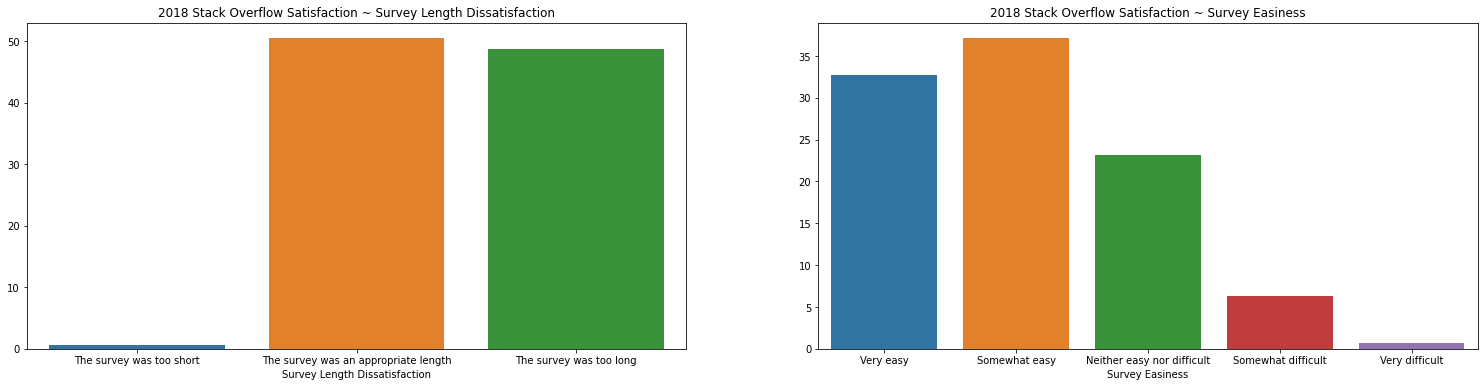

In [54]:
# Measuring 2018 Stack Overflow Satisfaction with respect to the survey length and easiness

plt.figure(figsize=(26, 6))

plt.subplot(121)
surv_2018 = 100*df_2018_q3.groupby('SurveyTooLong')['StackOverflowRecommend'].count()/df_2018_q3['StackOverflowRecommend'].count()
sns.barplot(surv_2018.index,surv_2018.values, order = ['The survey was too short', 'The survey was an appropriate length', 'The survey was too long'])
plt.xlabel('Survey Length Dissatisfaction')
plt.title('2018 Stack Overflow Satisfaction ~ Survey Length Dissatisfaction')

plt.subplot(122)
sueasy_2018 = 100*df_2018_q3.groupby('SurveyEasy')['StackOverflowRecommend'].count()/df_2018_q3['StackOverflowRecommend'].count()
sns.barplot(sueasy_2018.index,sueasy_2018.values, order = ['Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Very difficult'])
plt.xlabel('Survey Easiness')
plt.title('2018 Stack Overflow Satisfaction ~ Survey Easiness')

#### Result Evaluation

**Observations:**
- Stack Overflow Satisfaction is quite high in 2017 and increases by a huge margin in 2018.
- In 2017, it can be observed that the Stack Overflow Satisfaction is directly correlated to finding answer and amount of code copied. This makes perfect sense as those who find more answers or copy more code from the platform are guaranteed to be more satisfied. 
- It can also be noted that Stack Overflow was very helpful to users in 2017 with more than 95% in agreement. Although, more than 60% of the users were also dissatisfied with the survey as the survey was too long.
- In 2018, one can observe that the Stack Overflow Satisfaction is directly correlated to the number of visits made by the user. This statement is completely acceptable as the user would be more likely to visit the platform higher number of times if the platform is liked by them.
- The survey length for 2018 had more than 45% users who felt it was too long although more than 65% of them felt it was easy.
- Overall, the conclusion can be made that the survey provided good insights in the satisfaction of the Stack Overflow platform.